# Tessellation testing
Run tessellation using various tessellation generators:
1. `RNGGenerator` - Generates tessellations using a random uniform distribution to guide the drawing line.

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("..") # Move execution to root dir

In [2]:
from enum import Enum, auto
from typing import Optional

import numpy as np
from matplotlib import pyplot as plt 

from tessellation.draw import MPLDrawer
from tessellation.procgen.rng_generator import RNGGenerator

## Config

In [3]:
# Proc gen constants
SEED = 32
SIDE_LEN = 100

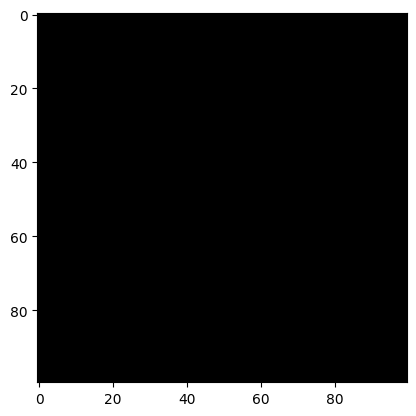

In [4]:
# Draw constants
CMAP = "gray"
drawer = MPLDrawer(CMAP)
drawer.draw(np.zeros((SIDE_LEN, SIDE_LEN), dtype=int))

## RNG Tessellation Generator

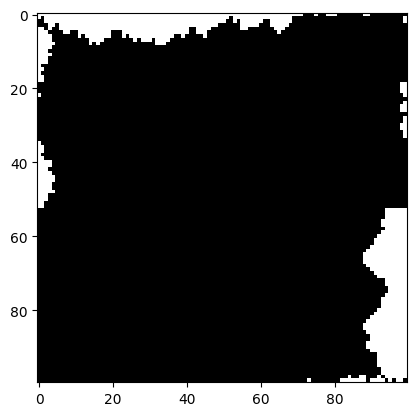

In [5]:
generator = RNGGenerator()
result = generator.generate(SIDE_LEN)
drawer.draw(result.mask)

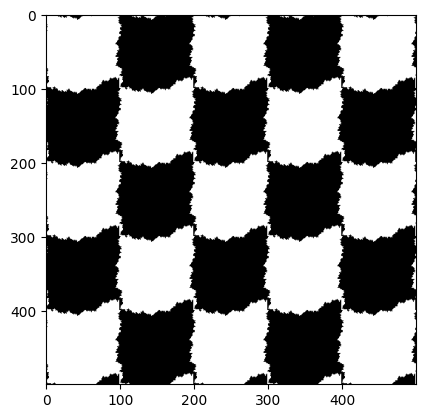

Press 'q' to quit, anything else to keep generating...


 q


In [6]:
from IPython.display import clear_output

while True:
    result = generator.generate(SIDE_LEN)
    tessellation = generator.tessellate(result)
    drawer.draw(tessellation)
    plt.show()
    
    print("Press 'q' to quit, anything else to keep generating...")
    user_input = input()
    if user_input.lower() == "q":
        break
    clear_output()